<a href="https://colab.research.google.com/github/areebahassan0099/FA24-BBD-086-DataAnalytics-/blob/main/(FA24_BBD_086)_Homework_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Importing Pandas and Numpy
import pandas as pd
import numpy as np

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv("melb_data.csv")

In [10]:
#Homework Task 1 pt 1
missing_percent = df.isna().sum() / len(df)*100
faulty_columns = missing_percent[missing_percent > 20].index.tolist()
print("Columns with more than 20% missing values:")
print(faulty_columns)
cleaned_data = df.drop(columns=faulty_columns)
print("Remaining columns after dropping faulty columns:")
print(cleaned_data.columns)


Columns with more than 20% missing values:
['BuildingArea', 'YearBuilt']
Remaining columns after dropping faulty columns:
Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')


In [11]:
#Homework Task 1 pt 2
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
print("Missing values after filling:")
print(df.isna().sum())

Missing values after filling:
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [12]:
#Homework Task 1 pt 3
# Step 1: Identify categorical columns (text-based)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
print("\nMissing values after filling categorical columns:")
print(df['CouncilArea'].isna().sum())


Missing values after filling categorical columns:
0


<ipython-input-12-2d452d964eb3>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [13]:
#Howmework Task 2 pt 1
richmond_houses = df[(df["Suburb"] == "Richmond") & (df["Price"] > 1000000)]
print(richmond_houses.head())


        Suburb          Address  Rooms Type      Price Method        SellerG  \
5257  Richmond       81 Erin St      3    h  1260000.0      S         Biggin   
5258  Richmond  52 Lyndhurst St      3    t  1236000.0      S         Jellis   
5263  Richmond        7 Bank St      3    h  1600000.0      S  hockingstuart   
5264  Richmond      29 Bowen St      3    h  2180000.0     PI           Blue   
5266  Richmond      131 Lord St      4    h  3335000.0      S         Jellis   

           Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
5257  3/09/2016       2.6    3121.0  ...       1.0  0.0     203.0   
5258  3/09/2016       2.6    3121.0  ...       2.0  1.0     675.0   
5263  3/12/2016       2.6    3121.0  ...       2.0  1.0     115.0   
5264  3/12/2016       2.6    3121.0  ...       2.0  2.0     345.0   
5266  3/12/2016       2.6    3121.0  ...       2.0  2.0     319.0   

      BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
5257          81.0     1900.0       

In [14]:
#Howmework Task 2 pt 2
df_filtered = df.loc[df["Landsize"] > 500, ["Price", "Suburb", "BuildingArea"]]
print(df_filtered)

           Price          Suburb  BuildingArea
20     1330000.0      Abbotsford         135.0
22     1090000.0      Abbotsford          27.0
45      720000.0    Airport West         126.0
46      785000.0    Airport West         127.0
47      725000.0    Airport West         186.0
...          ...             ...           ...
13570   970000.0  Wantirna South         126.0
13571  1330000.0  Wantirna South         191.0
13573   635000.0        Werribee         172.0
13575  1245000.0   Wheelers Hill         126.0
13578  2500000.0    Williamstown         157.0

[6175 rows x 3 columns]


In [15]:
#Homework Task 2 pt 3
df_sorted = df.sort_values(by="Price", ascending=False)
print(df_sorted.head(5))


            Suburb         Address  Rooms Type      Price Method  \
12094     Mulgrave     35 Bevis St      3    h  9000000.0     PI   
7692    Canterbury  49 Mangarra Rd      5    h  8000000.0     VB   
9575      Hawthorn    49 Lisson Gr      4    h  7650000.0      S   
3616           Kew     15 Barry St      6    h  6500000.0      S   
12557  Middle Park     136 Page St      5    h  6400000.0      S   

            SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
12094          Hall  29/07/2017      18.8    3170.0  ...       1.0  1.0   
7692      Sotheby's  13/05/2017       9.0    3126.0  ...       5.0  4.0   
9575   Abercromby's  17/06/2017       5.3    3122.0  ...       2.0  4.0   
3616         Jellis  13/08/2016       5.6    3101.0  ...       6.0  3.0   
12557      Marshall   9/09/2017       3.0    3206.0  ...       2.0  1.0   

       Landsize  BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
12094     744.0         117.0     1960.0       Monash -37.931

In [16]:
#Homewor Task 3 all parts
df["Price_per_Room"] = df["Price"] / df["Rooms"]
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df["Year_Sold"] = df["Date"].dt.year
print(df["Price_per_Room"])
print(df["Date"])
print(df["Year_Sold"])

0        740000.000000
1        517500.000000
2        488333.333333
3        283333.333333
4        400000.000000
             ...      
13575    311250.000000
13576    343666.666667
13577    390000.000000
13578    625000.000000
13579    321250.000000
Name: Price_per_Room, Length: 13580, dtype: float64
0       2016-12-03
1       2016-02-04
2       2017-03-04
3       2017-03-04
4       2016-06-04
           ...    
13575   2017-08-26
13576   2017-08-26
13577   2017-08-26
13578   2017-08-26
13579   2017-08-26
Name: Date, Length: 13580, dtype: datetime64[ns]
0        2016
1        2016
2        2017
3        2017
4        2016
         ... 
13575    2017
13576    2017
13577    2017
13578    2017
13579    2017
Name: Year_Sold, Length: 13580, dtype: int32


In [17]:
#Homework Task 4 pt 1
avg_price_by_suburb = df.groupby('Suburb')['Price'].mean().round(4).reset_index()
print("Average Property Price by Suburb:")
print(avg_price_by_suburb)


Average Property Price by Suburb:
           Suburb         Price
0      Abbotsford  1.060366e+06
1      Aberfeldie  1.277455e+06
2    Airport West  7.566567e+05
3       Albanvale  5.370833e+05
4     Albert Park  1.941355e+06
..            ...           ...
309    Wonga Park  9.000000e+05
310  Wyndham Vale  4.832500e+05
311     Yallambie  8.396875e+05
312    Yarra Glen  6.200000e+05
313    Yarraville  9.886155e+05

[314 rows x 2 columns]


In [18]:
#Homework Task 4 pt 2
properties_per_suburb = df.groupby("Suburb")["Price"].count()
print(properties_per_suburb)


Suburb
Abbotsford       56
Aberfeldie       44
Airport West     67
Albanvale         6
Albert Park      69
               ... 
Wonga Park        1
Wyndham Vale      4
Yallambie        24
Yarra Glen        1
Yarraville      164
Name: Price, Length: 314, dtype: int64


In [20]:
#Homework Task 4 pt 3
most_expensive_suburb = avg_price_by_suburb['Price'].idxmax()
print("Most expensive suburb:", avg_price_by_suburb.loc[most_expensive_suburb, 'Suburb'])


Most expensive suburb: Kooyong


Text(0.5, 0, 'Suburb')

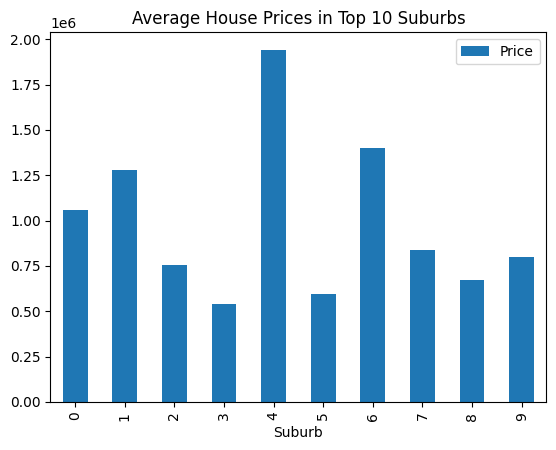

In [22]:
#Homework Task 5 pt 1
import matplotlib.pyplot as plt
avg_price_by_suburb.head(10).plot(kind="bar")
plt.title("Average House Prices in Top 10 Suburbs")
plt.xlabel("Suburb")